# Exercise 5 Solution: Bootstraping and Confidence Intervals

In this exercise, we explore two key methods used for statistical inference, bootstrapping and confidence intervals, which are essential for analyzing variability and uncertainty in neuroscience data. Whether you're estimating the mean firing rate of neurons, variability in EEG signals, or differences in brain connectivity, understanding these methods allows for more reliable conclusions about your data.


Specifically, we will:

1. **Bootstrapping:** Learn how to use resampling methods to estimate the distribution of a statistic, such as the mean or median, without relying on strong parametric assumptions. This is particularly useful when the underlying data distribution is unknown or when dealing with small sample sizes.

2. **Confidence Intervals:** Understand how to construct confidence intervals around estimates, providing a range of plausible values for the true population parameter. We’ll explore how bootstrapping can be used to calculate these intervals in situations where traditional methods may not apply.

3. **Applications in Neuroscience:** Apply bootstrapping and confidence intervals to real-world neuroscience problems, such as estimating the variability in synaptic weights across different brain regions or determining the reliability of EEG amplitudes across trials.

4. **Interpretation of Results:** Discuss how to interpret confidence intervals in a meaningful way, including understanding the trade-off between sample size and precision of the interval estimate, and why this matters for making decisions about experimental outcomes.

By the end of this exercise, you'll gain an understanding of how to use bootstrapping to quantify the uncertainty in your estimates, and how confidence intervals can provide more robust inferences in the context of neuroscience research.




In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

## Example 1: Bootstrap Confidence Interval For The Mean Amplitude

In [27]:
# Sample EEG P300 peak amplitudes
# data = np.array([4.1, 3.8, 4.0, 3.5, 4.2, 3.9, 4.3, 4.0, 3.7, 4.1,
#                  3.6, 4.2, 3.8, 3.9, 4.0, 3.7, 4.3, 4.1, 3.8, 4.2,
#                  3.9, 4.0, 3.8, 4.1, 4.0, 3.7, 4.2, 3.9, 3.8, 4.0,
#                  3.7])

# A highly variable dataset
data = np.array([4.1, 3.5, 3.8, 5.5, 4.2, 6.7, 3.9, 4.8, 7.1, 5.0,
                 4.0, 3.4, 6.2, 5.3, 4.9, 3.6, 6.0, 5.8, 4.3, 5.1,
                 3.7, 4.6, 6.5, 4.4, 4.7, 5.9, 6.1, 3.3, 4.2, 6.8,
                 7.0])



In [32]:
def bootstrap_ci(data, n_samples):
    bootstrap_means = []
    for _ in range(n_samples):
        # np.random.seed(1234)
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Compute the 95% confidence interval (2.5th and 97.5th percentiles)
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    return bootstrap_means, lower_bound, upper_bound

In [33]:
# Compute bootstrap means for 1,000 samples
bootstrap_means_1000, ci_lower_1000, ci_upper_1000 = bootstrap_ci(data, 1000)
print(f"95% Bootstrap Confidence Interval with 1,000 samples: ({ci_lower_1000:.2f}, {ci_upper_1000:.2f})")


95% Bootstrap Confidence Interval with 1,000 samples: (4.61, 5.37)


In [34]:
# Compute bootstrap means for 10,000 samples
bootstrap_means_10000, ci_lower_10000, ci_upper_10000 = bootstrap_ci(data, 10000)
print(f"95% Bootstrap Confidence Interval with 10,000 samples: ({ci_lower_10000:.2f}, {ci_upper_10000:.2f})")

95% Bootstrap Confidence Interval with 10,000 samples: (4.58, 5.39)


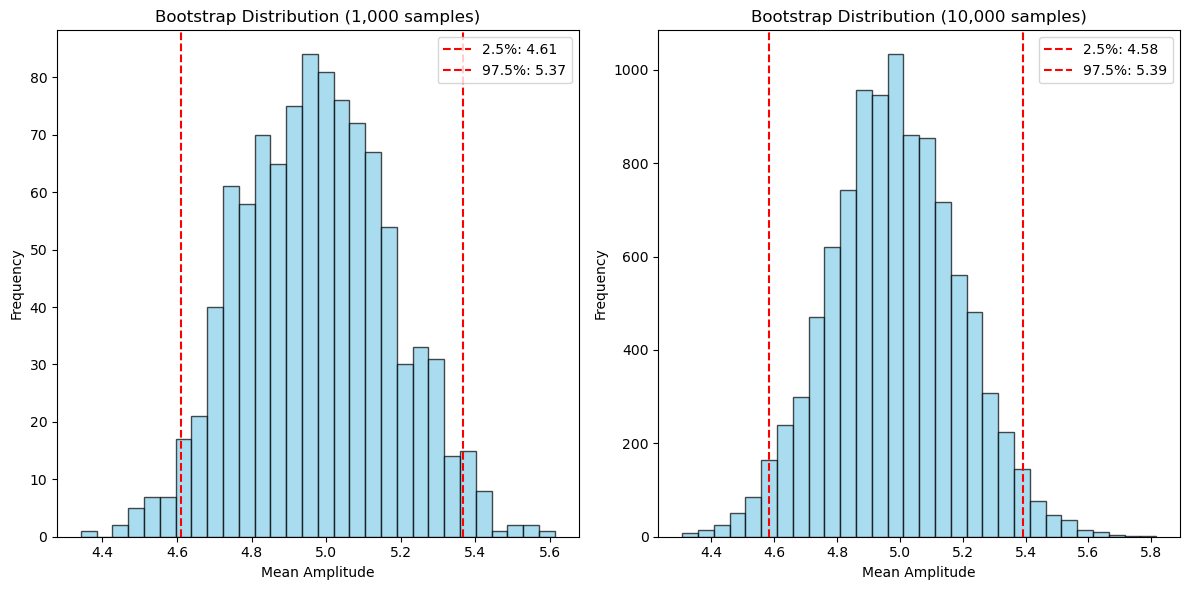

In [35]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot for 1,000 bootstrap samples
plt.subplot(1, 2, 1)
plt.hist(bootstrap_means_1000, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(ci_lower_1000, color='red', linestyle='--', label=f"2.5%: {ci_lower_1000:.2f}")
plt.axvline(ci_upper_1000, color='red', linestyle='--', label=f"97.5%: {ci_upper_1000:.2f}")
plt.title("Bootstrap Distribution (1,000 samples)")
plt.xlabel('Mean Amplitude')
plt.ylabel('Frequency')
plt.legend()

# Plot for 10,000 bootstrap samples
plt.subplot(1, 2, 2)
plt.hist(bootstrap_means_10000, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(ci_lower_10000, color='red', linestyle='--', label=f"2.5%: {ci_lower_10000:.2f}")
plt.axvline(ci_upper_10000, color='red', linestyle='--', label=f"97.5%: {ci_upper_10000:.2f}")
plt.title("Bootstrap Distribution (10,000 samples)")
plt.xlabel('Mean Amplitude')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## Example 2: Z-distribution and t-distribution

In [44]:
# Given
n = 50
sample_mean = 5.8


In [45]:
# Scenario A: σ known
pop_std = 1.2
se_z = pop_std / np.sqrt(n)
z_value = stats.norm.ppf(0.975)  # 95% CI, 2-tailed
ci_z = (sample_mean - z_value * se_z, sample_mean + z_value * se_z)

print("Scenario A (Z-distribution):")
print(f"  95% CI: {ci_z[0]:.2f} µV to {ci_z[1]:.2f} µV")



Scenario A (Z-distribution):
  95% CI: 5.47 µV to 6.13 µV


In [46]:
# Scenario B: σ unknown (use sample standard deviation)
sample_std = 1.3
se_t = sample_std / np.sqrt(n)
t_value = stats.t.ppf(0.975, df=n-1)
ci_t = (sample_mean - t_value * se_t, sample_mean + t_value * se_t)

print("Scenario B (T-distribution):")
print(f"  95% CI: {ci_t[0]:.2f} µV to {ci_t[1]:.2f} µV")


Scenario B (T-distribution):
  95% CI: 5.43 µV to 6.17 µV


In [47]:
# Comparison
print("Comparison:")
print(f"  CI Width (Z): {ci_z[1] - ci_z[0]:.2f} µV")
print(f"  CI Width (T): {ci_t[1] - ci_t[0]:.2f} µV")

Comparison:
  CI Width (Z): 0.67 µV
  CI Width (T): 0.74 µV


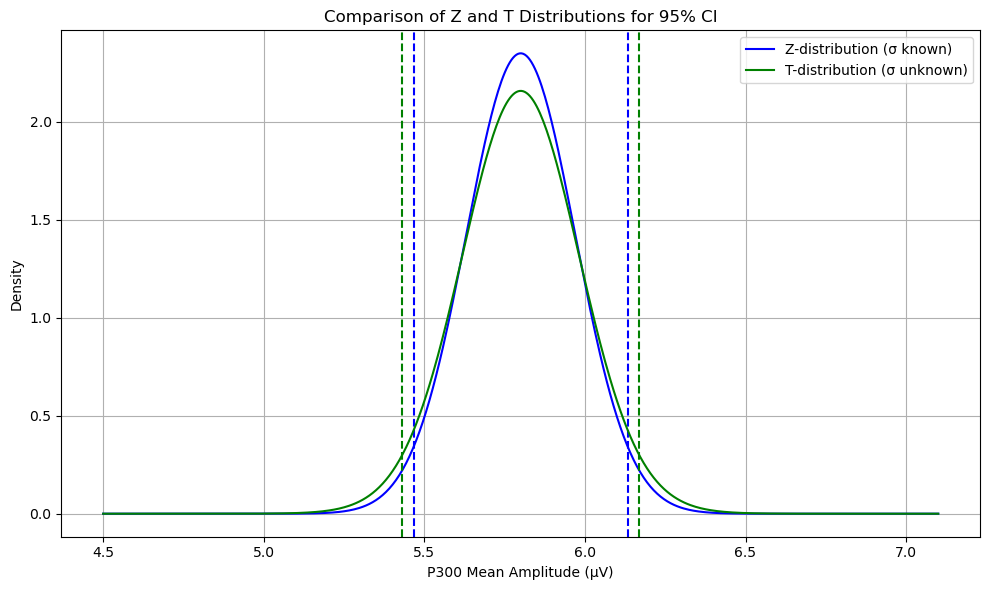

Z-distribution 95% CI: (5.467383082156077, 6.132616917843922)
T-distribution 95% CI: (5.430544088340914, 6.169455911659085)


In [48]:
# Create a range of values for plotting
x = np.linspace(4.5, 7.1, 500)

# Calculate PDFs
z_pdf = stats.norm.pdf(x, loc=sample_mean, scale=se_z)
t_pdf = stats.t.pdf((x - sample_mean) / se_t, df=n-1) / se_t  # Adjusted for scale

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, z_pdf, label="Z-distribution (σ known)", color='blue')
plt.axvline(ci_z[0], color='blue', linestyle='--')
plt.axvline(ci_z[1], color='blue', linestyle='--')

plt.plot(x, t_pdf, label="T-distribution (σ unknown)", color='green')
plt.axvline(ci_t[0], color='green', linestyle='--')
plt.axvline(ci_t[1], color='green', linestyle='--')

# Labels and legend
plt.title("Comparison of Z and T Distributions for 95% CI")
plt.xlabel("P300 Mean Amplitude (µV)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print CI values
print("Z-distribution 95% CI:", ci_z)
print("T-distribution 95% CI:", ci_t)


## Example 3: Confidence Interval

In [49]:
# Parameters
mean = 8.2
sigma = 1.5
n = 50

# Standard Error
se = sigma / np.sqrt(n)

# 95% Z-value
z = norm.ppf(0.975)

# CI
ci_lower = mean - z * se
ci_upper = mean + z * se
(ci_lower, ci_upper)


(7.784228852695096, 8.615771147304903)